## Activity A2 Hector Gilbert A00828786

* Write the name that characterizes the data set

Fifa World cup 2014

* Write the organisation that generated it

Kaggle Contributor Andre Becklas

* Include an internet link where they can be downloaded online and submit as a spreadsheet along with your corresponding report.

https://www.kaggle.com/abecklas/fifa-world-cup

* Describes the data set. What data does it contain?

This dataset contains every match that happend in Fifa world cup 2018.

In [1]:
#To know what data does contain, I’m gonna do a list of the data set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
%ls datasets/

adult.csv                    census.csv     nhanes_2015_2016.csv
airline_data.csv             coches.csv     pokemon.csv
antropometria00.csv          cwurData.csv   reg_data.csv
antropometria-dataset-2.csv  data.csv       sample_pivot.csv
antropometria-dataset.csv    headbrain.csv  tips.csv
Book3.csv                    mic2.xlsx      weight-height.csv
Canada.xlsx                  mic.xlsx       WorldCupMatches.csv
Cartwheeldata.csv            movies.csv


In [5]:
df= pd.read_csv("datasets/WorldCupMatches.csv")
df.head(81)

,Year,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,Home Team Initials,Away Team Initials
0,2014,Group A,Arena de Sao Paulo,Sao Paulo,Brazil,3,1,Croatia,,1,1,BRA,CRO
1,2014,Group A,Estadio das Dunas,Natal,Mexico,1,0,Cameroon,,0,0,MEX,CMR
2,2014,Group B,Arena Fonte Nova,Salvador,Spain,1,5,Netherlands,,1,1,ESP,NED
3,2014,Group B,Arena Pantanal,Cuiaba,Chile,3,1,Australia,,2,1,CHI,AUS
4,2014,Group C,Estadio Mineirao,Belo Horizonte,Colombia,3,0,Greece,,1,0,COL,GRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2014,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Penalty,0,0,NED,CRC
60,2014,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,0,5,BRA,GER
61,2014,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Penalty,0,0,NED,ARG
62,2014,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,0,2,BRA,NED


In [6]:
#List of different variables
x = df.columns.tolist()
x.sort()
x

['Away Team Goals',
 'Away Team Initials',
 'Away Team Name',
 'City',
 'Half-time Away Goals',
 'Half-time Home Goals',
 'Home Team Goals',
 'Home Team Initials',
 'Home Team Name',
 'Stadium',
 'Stage',
 'Win conditions',
 'Year']

* What are some of the questions you could answer with this data?

1. Which team score more goals in the final?
2. How many matches had won by extra time?
3. How many goals home team scored?
4. How many goals Away team scored?
5. How many teams participate in the tournament and in which stage?
6. Which city recived more goals?

* Research questions

1. What was the score goal ratio per game in the World Cup?
2. Which team recived more goals?
3. Which game scored more goals?

* Which stakeholder (company, sector of society, decentralized body, government, etc.) would be interested in the questions you identified in point 6?

-Soccer Fans

-FIFA

-Statistics

-National Teams

In [7]:
#Which team score more goals in th final?
goals= df.sort_values(["Stage"], ascending = True, axis= 0) #0 is row,  columns 1 
goals= goals.head(1)

In [8]:
goals.drop (['Half-time Away Goals','City','Half-time Home Goals','Home Team Initials','Stadium','Year','Away Team Initials','Win conditions'],
         axis = 1,
         inplace = True
        )

In [9]:
goals

,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
63,Final,Germany,1,0,Argentina


In [10]:
#How many matches had won by extra time?
et = df.sort_values(["Win conditions"], ascending = True, axis= 0) #0 is row,  columns 1 
et = et.head(64)
et.drop (['Half-time Away Goals','City','Half-time Home Goals','Home Team Initials','Stadium','Year','Away Team Initials','Home Team Goals','Away Team Goals'],
         axis = 1,
         inplace = True
        )
et

,Stage,Home Team Name,Away Team Name,Win conditions
0,Group A,Brazil,Croatia,
30,Group H,Korea Republic,Algeria,
62,Play-off for third place,Brazil,Netherlands,
32,Group B,Australia,Spain,
33,Group B,Netherlands,Chile,
...,...,...,...,...
63,Final,Germany,Argentina,Extra time
51,Round of 16,Costa Rica,Greece,Penalty
59,Quarter-finals,Netherlands,Costa Rica,Penalty
48,Round of 16,Brazil,Chile,Penalty


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


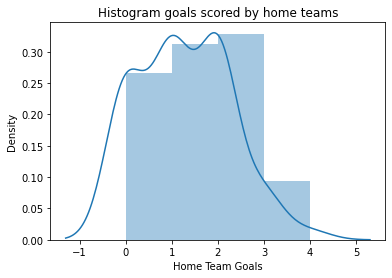

In [11]:
#How many goals home team scored?
sns.distplot(df["Home Team Goals"],
            ).set_title("Histogram goals scored by home teams")
            
plt.show()

In [12]:
#Goals Scored by Home Teams
pivot=pd.pivot_table(df,
                     index= "Home Team Name",
                     values= ["Home Team Goals"],
                     aggfunc= "sum",
                    )
pivot

,Home Team Goals
Home Team Name,
Algeria,1
Argentina,5
Australia,2
Belgium,5
Brazil,7
Cameroon,1
Chile,3
Colombia,7
Costa Rica,1


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


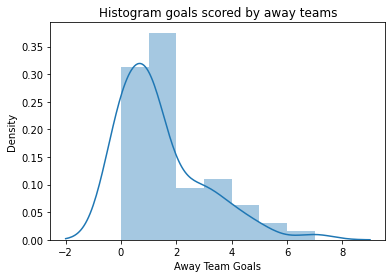

In [13]:
#How many goals Away team scored?
sns.distplot(df["Away Team Goals"],
            ).set_title("Histogram goals scored by away teams")
            
plt.show()

In [14]:
#Goals Scored by Away Teams
pivot=pd.pivot_table(df,
                     index= "Away Team Name",
                     values= ["Away Team Goals"],
                     aggfunc= "sum",
                    )
pivot

,Away Team Goals
Away Team Name,
Algeria,6
Argentina,3
Australia,1
Belgium,1
Brazil,4
Cameroon,0
Chile,3
Colombia,5
Costa Rica,4


In [15]:
#How many teams participate in the tournament and in which stage?
pivot=pd.pivot_table(df,
                     index= "Stage",
                     values= ["Home Team Name", "Away Team Name"],
                     aggfunc= "sum",
                     #columns= ["stage"],
                    )
pivot

,Away Team Name,Home Team Name
Stage,,
Final,Argentina,Germany
Group A,CroatiaCameroonMexicoCroatiaBrazilMexico,BrazilMexicoBrazilCameroonCameroonCroatia
Group B,NetherlandsAustraliaNetherlandsChileSpainChile,SpainChileAustraliaSpainAustraliaNetherlands
Group C,GreeceJapanC�te d'IvoireGreeceColombiaC�te d'I...,ColombiaC�te d'IvoireColombiaJapanJapanGreece
Group D,Costa RicaItalyEnglandCosta RicaUruguayEngland,UruguayEnglandUruguayItalyItalyCosta Rica
Group E,EcuadorHondurasFranceEcuadorSwitzerlandFrance,SwitzerlandFranceSwitzerlandHondurasHondurasEc...
Group F,"rn"">Bosnia and HerzegovinaNigeriaIR Iranrn"">Bo...","ArgentinaIR IranArgentinaNigeriaNigeriarn"">Bos..."
Group G,PortugalUSAGhanaPortugalGermanyGhana,GermanyGhanaGermanyUSAUSAPortugal
Group H,AlgeriaKorea RepublicRussiaAlgeriaBelgiumRussia,BelgiumRussiaBelgiumKorea RepublicKorea Republ...


In [16]:
#Which city recived more goals?
pivot=pd.pivot_table(df,
                     index= "City",
                     values= ["Home Team Goals", "Away Team Goals"],
                     aggfunc= "sum",
                     #columns= ["stage"],
                    )
pivot

,Away Team Goals,Home Team Goals
City,,
Belo Horizonte,9,8
Brasilia,10,10
Cuiaba,6,6
Curitiba,6,2
Fortaleza,8,9
Manaus,11,3
Natal,3,2
Porto Alegre,11,11
Recife,7,4
